# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Catharine Hening Larasati]
- **Email:** [heninglarasati5@gmail.com]
- **ID Dicoding:** [chlarasati]

## Menentukan Pertanyaan Bisnis

- Produk penjualan tertinggi berdasarkan _city_ dan _state_ bila dilihat dari tren bulanan?
- Bagaimana profil demografis pelanggan jika dilihat dari *state* dan *product category*?
- Bagaimana nilai rata-rata ongkos kirim berdasarkan lokasi penjual?
- Bagaimana tingkat kepuasan pembeli?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_df = pd.read_csv("/content/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Pertanyaan pertama, dataset yang dibutuhkan: order_items_df, orders_df, products_df, sellers_df
- Pertanyaan kedua, dataset yang dibutuhkan: customers_df, order_items_df, orders_df, products_df, sellers_df
- Pertanyaan ketiga, dataset yang dibutuhkan: order_items_df, orders_df, products_df, sellers_df
- Pertanyaan keempat, dataset yang dibutuhkan: order_reviews_df, order_items_df, orders_df, products_df, sellers_df

Secara keseluruhan data yang dipakai pada analisis ini adalah **customers_df**, **order_items_df**, **order_reviews_df**, **orders_df**, **products_df**, dan **sellers_df**.

### Assessing Data

**Costumers Dataset**

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Geolocation Dataset**

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Order Items Dataset**

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Order Payments Dataset**

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Order Reviews Dataset**

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Hal ini menunjukkan adanya missing values pada kolom review_comment_title dan review_comment_message.

In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Orders Dataset**

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Product Category Dataset**


In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Products Dataset**

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Sellers Dataset**

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Terdapat duplikasi data pada data **geolocation_df**
- Terdapat *missing values* pada data **orders_df**, **order_reviews_df**,dan **products_df** sehingga perlu dilakukan _imputation_ ataupun *dropping*
- Mengganti tipe data menjadi datetime pada beberapa kolom dalam data **order_items_df**, **order_reviews_df**, dan **orders_df**



### Cleaning Data

**Data Duplicate**














In [ ]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Dropping**

In [ ]:
order_reviews_dropcol=[ "review_comment_title","review_comment_message"]

order_reviews_df.drop(order_reviews_dropcol, axis= 1, inplace= True)

order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_dropcol=[ "order_approved_at",
                 "order_delivered_carrier_date",
                 "order_estimated_delivery_date"]

orders_df.drop(orders_dropcol, axis= 1, inplace= True)

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02


In [ ]:
product_dropcol = ["product_name_lenght",
                    "product_description_lenght",
                    "product_photos_qty",
                    "product_weight_g",
                    "product_length_cm",
                    "product_height_cm",
                    "product_width_cm"]

products_df.drop(product_dropcol, axis= 1, inplace= True)

products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


**Imputation**

In [ ]:
products_df["product_category_name"].fillna(products_df["product_category_name"].mode()[0], inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


**Menangani Kesalahan Tipe Data**

In [ ]:
items_datetime = ["shipping_limit_date"]

for col in items_datetime:
  order_items_df[col] = pd.to_datetime(order_items_df[col])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
orders_datetime = ["order_purchase_timestamp","order_delivered_customer_date"]

for col in orders_datetime:
  orders_df[col] = pd.to_datetime(orders_df[col])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


In [ ]:
reviews_datetime = ["review_creation_date","review_answer_timestamp"]

for col in reviews_datetime:
  order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


**Insight:**
- Pembersihan data dilakukan agar hasil yang diperoleh lebih akurat. Dalam hal ini dilakukan pembersihan data berupa pengnhapusan data duplikat, penghapusan kolom yang tidak digunakan dalam analisis, pengisisan nilai kosong, serta pengubahan tipe data datetime


## Exploratory Data Analysis (EDA)

### Explore All Data

> Dalam konteks ini, all data yang dimaksud adalah data-data yang digunakan dalam analisis



In [ ]:
all_df = pd.merge(orders_df, order_items_df, on="order_id", how="left")
all_df = pd.merge(all_df, order_reviews_df, on="order_id", how="left")
all_df = pd.merge(all_df, customers_df, on="customer_id", how="left")
all_df = pd.merge(all_df, products_df, on="product_id", how="left")
all_df = pd.merge(all_df, sellers_df, on="seller_id", how="left")

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   customer_id                    114092 non-null  object        
 2   order_status                   114092 non-null  object        
 3   order_purchase_timestamp       114092 non-null  datetime64[ns]
 4   order_delivered_customer_date  110839 non-null  datetime64[ns]
 5   order_item_id                  113314 non-null  float64       
 6   product_id                     113314 non-null  object        
 7   seller_id                      113314 non-null  object        
 8   shipping_limit_date            113314 non-null  datetime64[ns]
 9   price                          113314 non-null  float64       
 10  freight_value                  113314 non-null  float64       
 11  

**Insight:**
- Analisis pertama menunjukkan tren penjualan bulanan untuk berbagai kategori produk serta produk terlaris per kota dan negara bagian, yang mengindikasikan variasi preferensi konsumen berdasarkan lokasi. Informasi ini dapat digunakan untuk merencanakan strategi pemasaran dan pengembangan produk yang lebih baik.

- Analisis kedua menunjukkan jumlah pelanggan bervariasi berdasarkan kota dan negara bagian, dengan beberapa daerah memiliki konsentrasi pelanggan yang lebih tinggi. Selain itu, kategori produk tertentu menarik lebih banyak pelanggan, yang dapat memberikan wawasan berharga untuk strategi pemasaran yang ditargetkan berdasarkan daerah.

- Analisis rata-rata ongkos kirim menunjukkan bahwa biaya pengiriman bervariasi secara signifikan antar kota, dengan beberapa kota memiliki ongkos kirim yang lebih tinggi dibandingkan yang lain. Selain itu, perbandingan rata-rata ongkos kirim berdasarkan negara bagian juga memberikan wawasan tentang perbedaan biaya logistik yang dapat mempengaruhi strategi pengiriman dan penetapan harga bagi penjual.

- Analisis rata-rata skor ulasan per kategori produk menunjukkan bagaimana kepuasan pelanggan bervariasi di antara kategori-kategori produk yang berbeda. Kategori produk dengan skor ulasan tertinggi menunjukkan tingkat kepuasan yang lebih baik, yang dapat menjadi indikator untuk mengidentifikasi area yang kuat dalam portofolio produk serta untuk merumuskan strategi pemasaran yang lebih efektif.


### Explore Data order_items_df, orders_df, sellers_df, & products_df

> Eksplorasi ini dilakukan untuk menjawab pertanyaan 1


In [ ]:
# Merge data order_items_df dengan orders_df
items_products_df = pd.merge(
    left=order_items_df,
    right=orders_df[["order_id", "customer_id", "order_purchase_timestamp"]],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Merge data items_products_df dengan sellers_df
items_products_df = pd.merge(
    left=items_products_df,
    right=sellers_df[["seller_id", "seller_city", "seller_state"]],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

# Merge data items_products_df dengan products_df
items_products_df = pd.merge(
    left=items_products_df,
    right=products_df[["product_id", "product_category_name"]],
    how="left",
    left_on="product_id",
    right_on="product_id"
)

In [ ]:
# Menghitung penjualan produk per bulan
items_products_df["purchase_month"] = items_products_df["order_purchase_timestamp"].dt.month

monthly_trend_products = items_products_df.groupby(["purchase_month", "product_category_name"])["order_item_id"].count().reset_index()
monthly_trend_products.rename(columns={"order_item_id": "total_sales"}, inplace=True)
monthly_trend_products.head()

,purchase_month,product_category_name,total_sales
0,1,agro_industria_e_comercio,21
1,1,alimentos,22
2,1,alimentos_bebidas,11
3,1,artes,19
4,1,artigos_de_festas,2


In [ ]:
best_selling_state = items_products_df.groupby(["seller_state","purchase_month","product_category_name"]).size().reset_index(name="order_count")
top_selling_per_state = best_selling_state.loc[best_selling_state.groupby("seller_state")["order_count"].idxmax()]
top_selling_per_state.head()

,seller_state,purchase_month,product_category_name,order_count
0,AC,10,livros_tecnicos,1
2,AM,3,telefonia,2
58,BA,8,telefonia,87
95,CE,3,alimentos,10
133,DF,1,cool_stuff,19


In [ ]:
best_selling_city = items_products_df.groupby(["seller_city","purchase_month","product_category_name"]).size().reset_index(name="order_count")
top_selling_per_city = best_selling_city.loc[best_selling_city.groupby("seller_city")["order_count"].idxmax()]
top_selling_per_city.head()

,seller_city,purchase_month,product_category_name,order_count
0,04482255,8,beleza_saude,1
1,abadia de goias,7,beleza_saude,1
2,afonso claudio,1,informatica_acessorios,2
7,aguas claras df,2,esporte_lazer,1
9,alambari,3,utilidades_domesticas,2


### Explore Data customers_df & items_products_df

> Eksplorasi ini dilakukan untuk menjawab pertanyaan 2

In [ ]:
# Jumlah pelanggan per kota
city_count = customers_df["customer_city"].value_counts()

In [ ]:
# Jumlah pelanggan per status
state_count = customers_df["customer_state"].value_counts()

In [ ]:
product_customer_df = items_products_df.groupby(["product_category_name", "customer_id"]).size().reset_index(name="order_count")
category_count = product_customer_df.groupby("product_category_name")["order_count"].count()

### Explore Data items_products_df

> Eksplorasi ini dilakukan untuk menjawab pertanyaan 3

In [ ]:
# Rata-rata ongkos kirim berdasarkan kota penjual
avg_freight_by_city = items_products_df.groupby("seller_city")["freight_value"].mean().sort_values(ascending=False).head(10)

In [ ]:
# Rata-rata ongkos kirim berdasarkan state penjual
avg_freight_by_state = items_products_df.groupby("seller_state")["freight_value"].mean()

### Explore Data order_reviews_df & items_products_df

> Eksplorasi ini dilakukan untuk menjawab pertanyaan 4

In [ ]:
# Merge data order_reviews_df dengan items_products_df
review_by_category = pd.merge(
    left=order_reviews_df,
    right=items_products_df[["order_id", "product_category_name"]],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

review_by_category.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,esporte_lazer
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,esporte_lazer
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13,informatica_acessorios
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24,informatica_acessorios
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06,ferramentas_jardim


In [ ]:
avg_review_by_category = review_by_category.groupby("product_category_name")["review_score"].mean().sort_values(ascending=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk penjualan tertinggi berdasarkan _city_ dan _state_ bila dilihat dari tren bulanan?

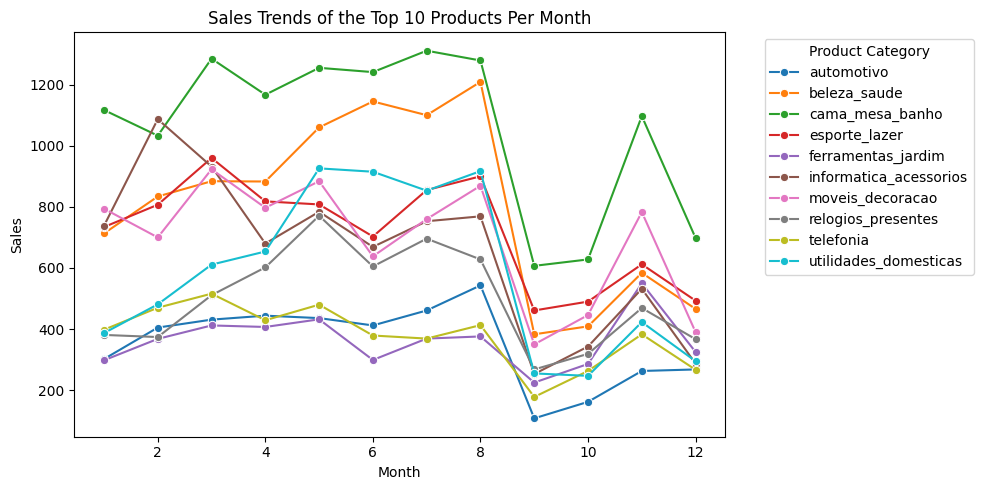

In [ ]:
top_product_categories = monthly_trend_products.groupby("product_category_name")["total_sales"].sum().nlargest(10).index
filtered_trend_products = monthly_trend_products[monthly_trend_products["product_category_name"].isin(top_product_categories)]

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=filtered_trend_products,
    x="purchase_month",
    y="total_sales",
    hue="product_category_name",
    marker="o"
)
plt.title("Sales Trends of the Top 10 Products Per Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-63-33c4578a711d>:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=top_10_selling_per_state, x="order_count", y="seller_state", hue="product_category_name", palette=colors, dodge=False)


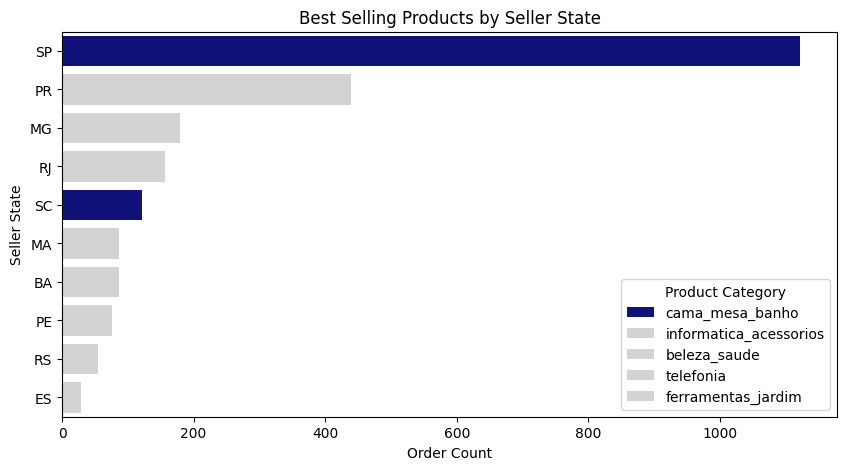

In [ ]:
top_selling_per_state_sorted = top_selling_per_state.sort_values(by="order_count", ascending=False)

top_10_selling_per_state = top_selling_per_state_sorted.head(10)

colors = ["darkblue" if i == top_10_selling_per_state["order_count"].max() else "lightgrey" for i in top_10_selling_per_state["order_count"]]

plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_selling_per_state, x="order_count", y="seller_state", hue="product_category_name", palette=colors, dodge=False)
plt.title("Best Selling Products by Seller State")
plt.xlabel("Order Count")
plt.ylabel("Seller State")
plt.legend(title="Product Category")
plt.show()

<ipython-input-64-03217cb598e9>:8: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.barplot(data=top_10_selling_per_city, x="order_count", y="seller_city", hue="product_category_name", palette=colors_city, dodge=False)


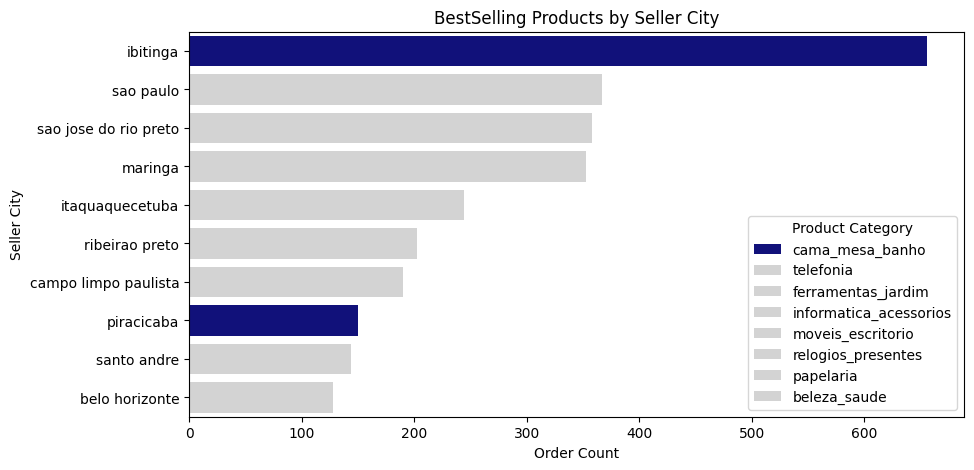

In [ ]:
top_selling_per_city_sorted = top_selling_per_city.sort_values(by="order_count", ascending=False)

top_10_selling_per_city = top_selling_per_city_sorted.head(10)

colors_city = ["darkblue" if i == top_10_selling_per_city["order_count"].max() else "lightgrey" for i in top_10_selling_per_city["order_count"]]

plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_selling_per_city, x="order_count", y="seller_city", hue="product_category_name", palette=colors_city, dodge=False)
plt.title("BestSelling Products by Seller City")
plt.xlabel("Order Count")
plt.ylabel("Seller City")
plt.legend(title="Product Category")
plt.show()

**Insight:**

- Grafik pertama menunjukkan fluktuasi penjualan 10 produk teratas sepanjang tahun, di mana produk seperti **cama_mesa_banho** dan **beleza_saude** menunjukkan penjualan stabil dengan beberapa lonjakan, sementara kategori produk seperti **telefonia** dan **informatica_acessorios** mengalami fluktuasi lebih besar yang mungkin dipengaruhi oleh faktor musiman atau promosi tertentu.
- Grafik penjualan berdasarkan negara bagian menunjukkan **SP** sebagai wilayah dengan penjualan tertinggi, diikuti oleh **PR** dan **MG**, dengan **cama_mesa_banho** mendominasi, menandakan preferensi lokal yang kuat.
- Grafik penjualan berdasarkan kota menunjukkan **Ibitinga** dengan penjualan tertinggi untuk **cama_mesa_banho**, sementara kota lain seperti **Piracicaba** dan **São Paulo** memiliki variasi produk yang lebih beragam, mencerminkan preferensi konsumen yang berbeda.

###Pertanyaan 2: Bagaimana profil demografis pelanggan jika dilihat dari *state* dan *product category*?

<ipython-input-65-22031d6403e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette=colors)


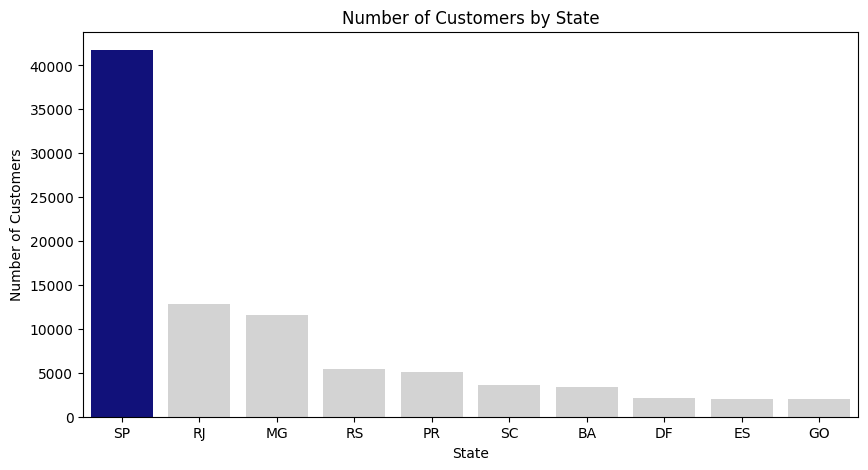

In [ ]:
top_states = state_count.nlargest(10)

colors = ["darkblue" if count == top_states.max() else "lightgrey" for count in top_states]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette=colors)
plt.title("Number of Customers by State")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()

<ipython-input-66-f74f78d45f9e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette=colors)


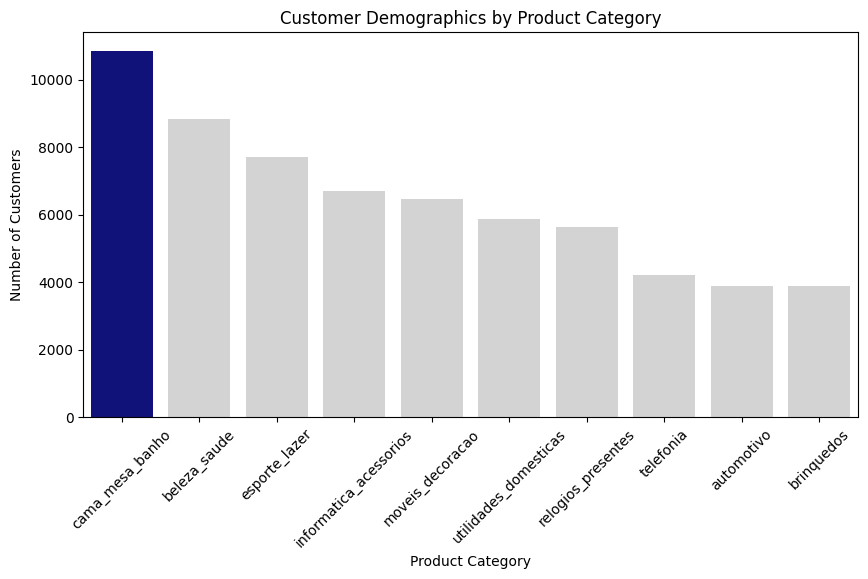

In [ ]:
top_categories = category_count.nlargest(10)

colors = ["darkblue" if count == top_categories.max() else "lightgrey" for count in top_categories]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette=colors)
plt.title("Customer Demographics by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

**Insight:**

Kedua Bar Chart di atas menampilkan distribusi pelanggan berdasarkan negara bagian dan kategori produk, yang menunjukkan variasi dalam demografi pelanggan, baik berdasarkan wilayah geografis maupun preferensi kategori produk.

* Pada grafik pertama, ditunjukkan sepuluh negara bagian dengan jumlah pelanggan terbanyak. Grafik ini menunjukkan bahwa negara bagian dengan jumlah pelanggan tertinggi adalah **São Paulo (SP)**. Hal ini menunjukkan bahwa São Paulo adalah pasar terbesar berdasarkan jumlah pelanggan.

* Pada grafik kedua, ditunjukkan sepuluh kategori produk yang memiliki jumlah pelanggan terbanyak. Kategori produk dengan jumlah pelanggan tertinggi adalah **cama_mesa_banho**, yang mengindikasikan bahwa kategori ini paling populer di kalangan pelanggan.

### Pertanyaan 3: Bagaimana nilai rata-rata ongkos kirim berdasarkan lokasi penjual?

<ipython-input-67-f5756c9762d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freight_by_city.index, y=freight_by_city.values, palette=colors)


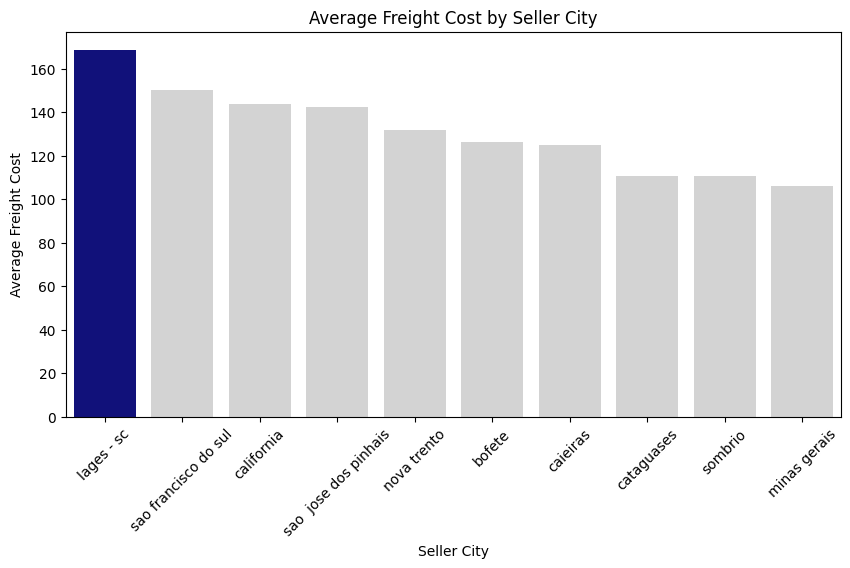

In [ ]:
freight_by_city = avg_freight_by_city.nlargest(10)

colors = ["darkblue" if cost == freight_by_city.max() else "lightgrey" for cost in freight_by_city]

plt.figure(figsize=(10, 5))
sns.barplot(x=freight_by_city.index, y=freight_by_city.values, palette=colors)
plt.title("Average Freight Cost by Seller City")
plt.xlabel("Seller City")
plt.ylabel("Average Freight Cost")
plt.xticks(rotation=45)
plt.show()


<ipython-input-68-e9bd693010c8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freight_sales_by_state.index, y=freight_sales_by_state.values, palette=colors)


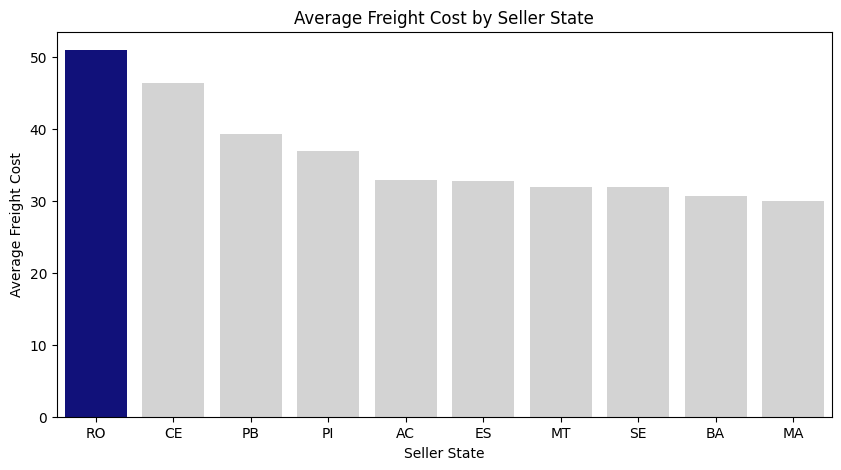

In [ ]:
freight_sales_by_state = avg_freight_by_state.nlargest(10)

colors = ["darkblue" if cost == freight_sales_by_state.max() else "lightgrey" for cost in freight_sales_by_state]

plt.figure(figsize=(10, 5))
sns.barplot(x=freight_sales_by_state.index, y=freight_sales_by_state.values, palette=colors)
plt.title("Average Freight Cost by Seller State")
plt.xlabel("Seller State")
plt.ylabel("Average Freight Cost")
plt.show()

**Insight:**

Kedua Bar Chart di atas menampilkan biaya pengiriman rata-rata tertinggi berdasarkan kota penjual dan negara bagian penjual.

* Grafik pertama menunjukkan sepuluh kota dengan biaya pengiriman rata-rata tertinggi. Grafik ini menunjukkan bahwa kota dengan biaya pengiriman rata-rata tertinggi adalah **Lages, SC**. Ini menunjukkan bahwa Lages, SC adalah kota dengan nilai pengiriman paling mahal.

* Grafik kedua menampilkan sepuluh negara bagian dengan biaya pengiriman rata-rata tertinggi, dengan negara bagian **Rondônia (RO)** sebagai yang memiliki ongkos kirim paling mahal.

### Pertanyaan 4: Bagaimana tingkat kepuasan pembeli?

<ipython-input-69-e66cb17fdbe5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_review_categories.values, y=top_review_categories.index, palette=colors)


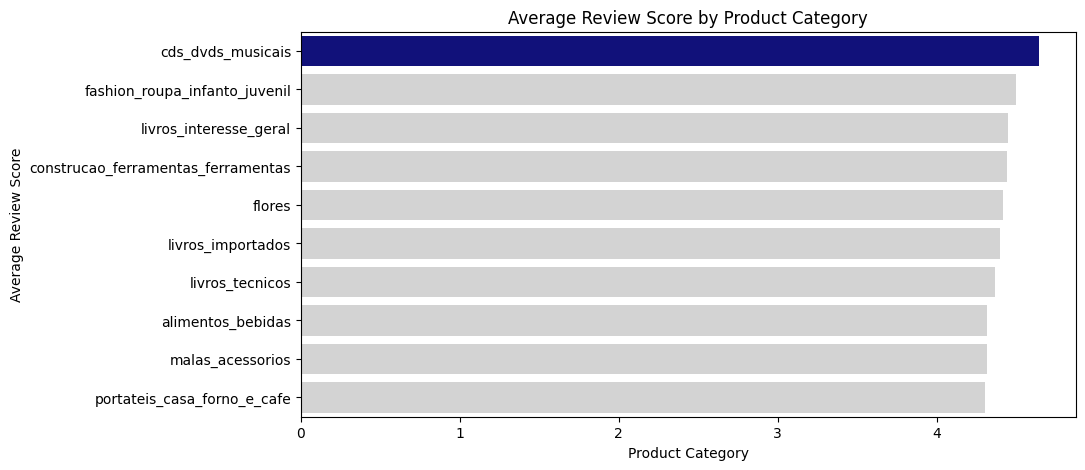

In [ ]:
top_review_categories = avg_review_by_category.nlargest(10)

colors = ["darkblue" if score == top_review_categories.max() else "lightgrey" for score in top_review_categories]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_review_categories.values, y=top_review_categories.index, palette=colors)
plt.title("Average Review Score by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Review Score")
plt.show()

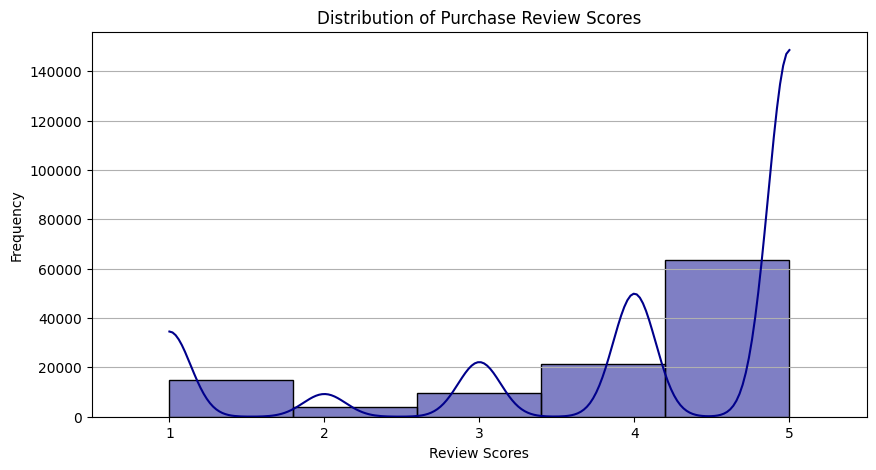

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(review_by_category["review_score"], bins=5, kde=True, color="darkblue")
plt.title("Distribution of Purchase Review Scores")
plt.xlabel("Review Scores")
plt.ylabel("Frequency")
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.xlim(0.5, 5.5)
plt.grid(axis="y")
plt.show()

**Insight:**

* Bar Chart menunjukkan sepuluh kategori produk dengan rata-rata skor ulasan tertinggi. Grafik ini menunjukkan bahwa produk dalam kategori **CDs, DVDs, Musicais** memiliki rata-rata dengan penilaian yang tertinggi dibandingkan kategori produk lainnya. Ini menunjukkan bahwa pelanggan merasa lebih puas terhadap kategori produk CDs, DVDs, Musicais.

* Histogram distribusi skor ulasan menggambarkan bagaimana skor ulasan dari pelanggan tersebar dalam skala 1 hingga 5. Mayoritas ulasan terkonsentrasi pada skor **4 dan 5**, yang menunjukkan bahwa pelanggan merasa puas dengan produk yang mereka beli. Namun, tidak menutup kemungkinan bahwa masih ada yang tidak puas terhadap beberapa produk karena ada beberapa ulasan dengan skor yang lebih rendah.



## Conclusion

### **Produk penjualan tertinggi berdasarkan _city_ dan _state_ bila dilihat dari tren bulanan?**
Analisis grafik penjualan menunjukkan bahwa produk cama_mesa_banho dan beleza_saude memiliki permintaan konsisten sepanjang tahun, sementara telefonia dan informatica_acessorios mengalami fluktuasi yang lebih besar. Negara bagian SP mencatat penjualan tertinggi, diikuti PR dan MG, dengan dominasi produk cama_mesa_banho mencerminkan preferensi lokal yang kuat. Di tingkat kota, Ibitinga memiliki penjualan tertinggi dengan variasi produk yang berbeda di kota-kota lain, menandakan bahwa preferensi pelanggan bervariasi berdasarkan waktu dan lokasi. Analisis ini memberikan wawasan penting untuk strategi pemasaran dan pengembangan produk.


### **Bagaimana profil demografis pelanggan jika dilihat dari *state* dan *product category*?**
São Paulo (SP) menonjol sebagai negara bagian dengan jumlah pelanggan terbesar, mencerminkan tingkat populasi yang tinggi serta daya beli yang lebih besar dibandingkan wilayah lain. Di sisi lain, kategori produk cama_mesa_banho muncul sebagai yang paling populer di kalangan pelanggan. Ini mengindikasikan permintaan yang signifikan terhadap produk-produk rumah tangga.


### **Bagaimana nilai rata-rata ongkos kirim berdasarkan lokasi penjual?**
Kota Lages, SC memiliki biaya pengiriman rata-rata tertinggi, yang dapat mengindikasikan kesulitan pengiriman ke kota-kota ini, baik karena jarak maupun keterbatasan infrastruktur logistik. Sementara itu, Rondônia (RO) sebagai negara bagian dengan ongkos kirim tertinggi mengisyaratkan adanya tantangan geografis yang membuat biaya pengiriman di wilayah ini lebih mahal. Oleh karena itu, optimalisasi infrastruktur atau pengaturan logistik khusus mungkin diperlukan untuk mengurangi biaya pengiriman di kota-kota dan wilayah tersebut.

### **Bagaimana tingkat kepuasan pembeli?**
São Paulo (SP) merupakan negara bagian dengan jumlah pelanggan terbesar, mencerminkan tingkat urbanisasi, populasi yang tinggi, serta daya beli yang lebih besar dibandingkan wilayah lain. Di sisi lain, kategori produk cama_mesa_banho muncul sebagai yang paling populer di kalangan pelanggan, mengindikasikan permintaan yang signifikan terhadap produk-produk rumah tangga. Oleh karena itu, strategi penawaran untuk produk ini dapat dioptimalkan melalui promosi yang lebih kuat di wilayah-wilayah dengan daya beli tinggi seperti São Paulo.

In [ ]:
all_df.to_csv("main_data.csv", index=False)

In [ ]:
print(all_df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')
